In [1]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import itemfreq
import matplotlib.gridspec as gridspec

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.convolutional import Convolution2D

/home/mark/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/mark/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using Theano backend.


In [2]:
gif = Image.open('simple.gif')

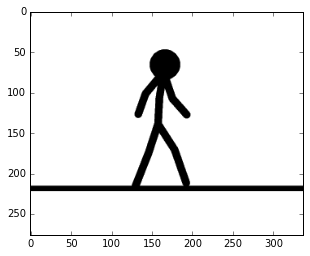

In [3]:
plt.imshow(gif)

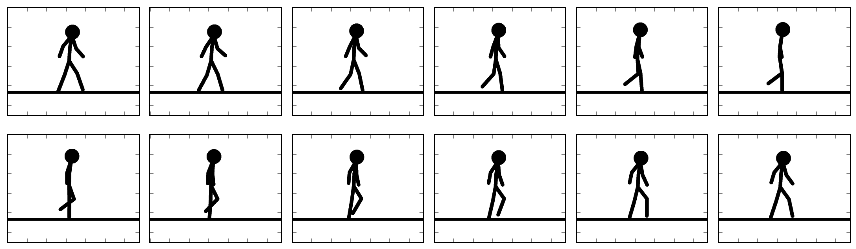

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12,4))

for i, ax in enumerate(axes.flat):
    gif.seek(i)
    im = np.array(gif.convert('L'))
    im = im / (1.0 * im.max())
    ax.imshow(im, cmap=cm.gray)
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.tight_layout()
plt.show()

In [5]:
im.shape

(276, 337)

In [54]:
def get_frame_data(n):
    gif.seek(n)
    im = np.array(gif.convert('L'))
    return 1 - im / (1.0 * im.max())

x = np.ndarray((12, 3, 276, 337))
y = np.ndarray((12, 1, 276, 337))

for i in range(12):
    for j in range(3):
        x[i, j] = get_frame_data((i + j) % 12)
    y[i, 0] = get_frame_data((i + j + 1) % 12)

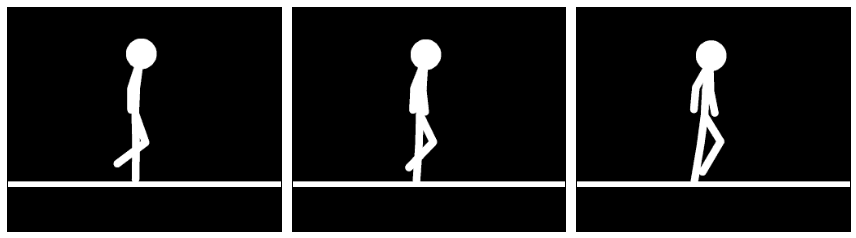

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

for i, ax in enumerate(axes.flat):
    ax.imshow(data[6, i], cmap=cm.gray)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
plt.tight_layout()
plt.show()

In [8]:
im.shape

(276, 337)

In [30]:
from keras.layers import Input, Dense, Convolution2D, Flatten, LSTM, Reshape, TimeDistributed
from keras.models import Model

In [10]:
im.shape

(276, 337)

In [133]:
# this returns a tensor
inputs = Input(shape=(12, 3, 276, 337))

model = TimeDistributed(Convolution2D(10, 3, 3)) (inputs)
model = TimeDistributed(Flatten()) (model)
model = LSTM(32) (model)
# model = Flatten() (model)
model = Dense((276 * 337), activation='softmax') (model)
output = Reshape((276, 337)) (model)

In [134]:
model = Model(input=inputs, output=output)
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [135]:
model.fit(x, y, verbose=2)  # starts training

INFO (theano.gof.compilelock): Refreshing lock /home/mark/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.1-64/lock_dir/lock


Epoch 1/10


TypeError: ('Bad input argument to theano function with name "/home/mark/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py:514"  at index 0(0-based)', 'Wrong number of dimensions: expected 5, got 4 with shape (12, 3, 276, 337).')